# Identification
Please indicate your name

Student 1: Defne Gülmez

Student 2: Yalda Eftekhari

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div>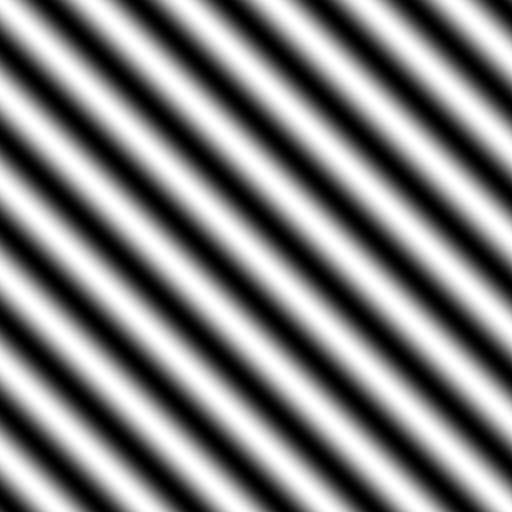</div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [36]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
#taken out because it causes errors
#%matplotlib notebook 
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


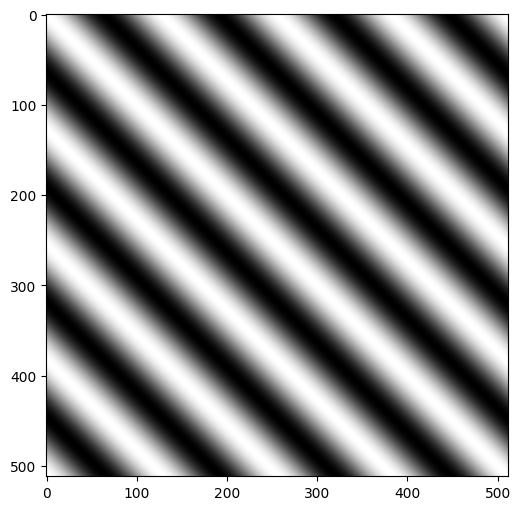

In [37]:
signal = sinusoid2d(1, 45, 512, 90, 1)
'''
T0 is changed to 90 as you mentioned in the class
Increasing T0 improves frequency resolution and narrows the spectral peaks in the Fourier Transform,
leading to better distinction between closely spaced frequency components
'''
imshow(signal)
plt.show() 

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

The maximal frequency in the  t-direction occurs when u = 0, so $f_t^{\text{max}} = f_0 \cos(\theta) $.
\
The maximal frequency in the  u-direction occurs when t = 0, so $f_u^{\text{max}} = f_0 \sin(\theta) $.
\
(It should be noted that since we don't use angular frequency here, we get rid of the 2 pi)
\
if we put 45 degrees for $\theta$ we get that both is equal to $\frac{f_0}{\sqrt{2}}$ which would also be equal to $f_m$, since it is equal to the maximum of the maximal frequencies in both directions.
\
Using the Shannon theorem, we have that the sampling frequency $ f_s $  should be:
$
f_s \geq 2f_m = 2 \times \frac{f_0}{\sqrt{2}} = \frac{2f_0}{\sqrt{2}} = \sqrt{2} f_0
$



2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

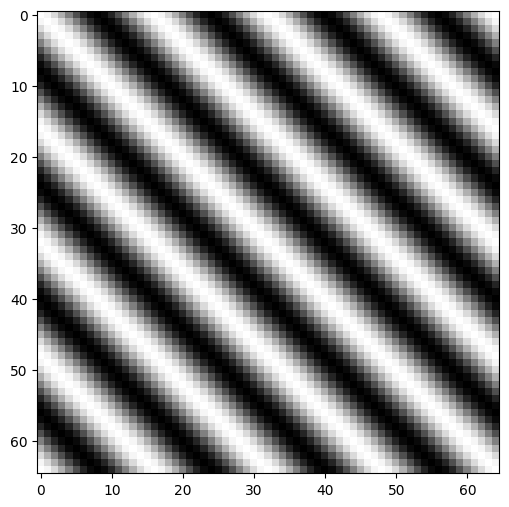

In [38]:
#to calculate the new T_s
f_0 = 1/90
f_max = f_0 / np.sqrt(2) #maximal freq. done in the above question
f_s = 16 * f_max # sampling freq
T_s = 1 / f_s 


sampled_signal = sinusoid2d(1, 45, 512, 90, T_s)
imshow(sampled_signal)

2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

/tmp/ipykernel_59000/32818024.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


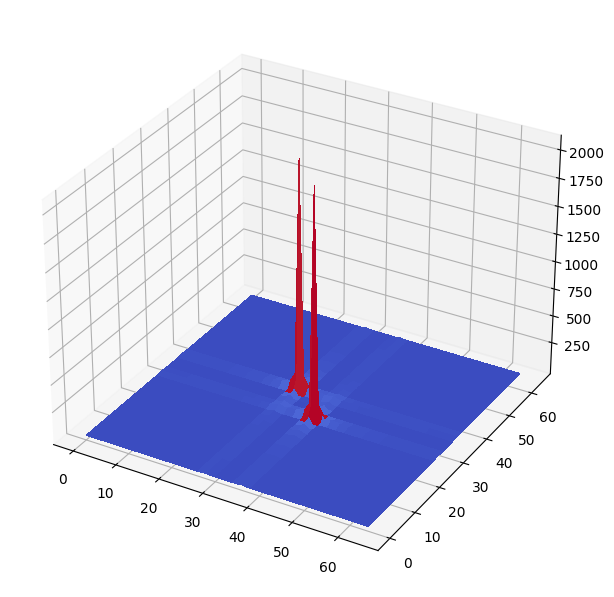

In [39]:
FT_signal = fft2(sampled_signal)
FT_shifted = np.abs(fftshift(FT_signal))
#%matplotlib notebook is taken out
#tried to do this but we get the error: Javascript Error: IPython is not defined
#so the graph is not interactive but still does the job
surf(FT_shifted, title="Fourier Transform of the Sampled Signal" ) 


2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

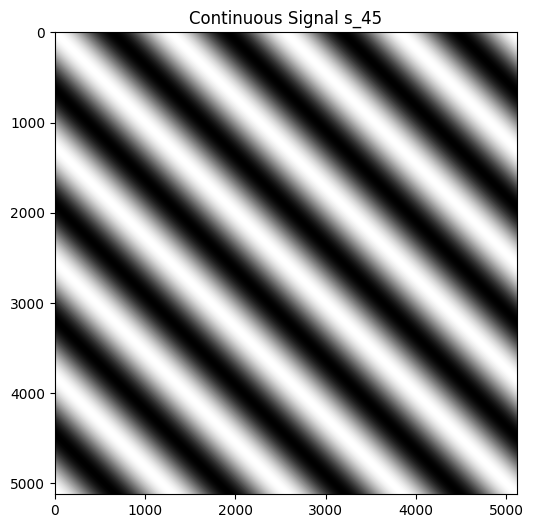

/tmp/ipykernel_59000/32818024.py:41: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(projection='3d')


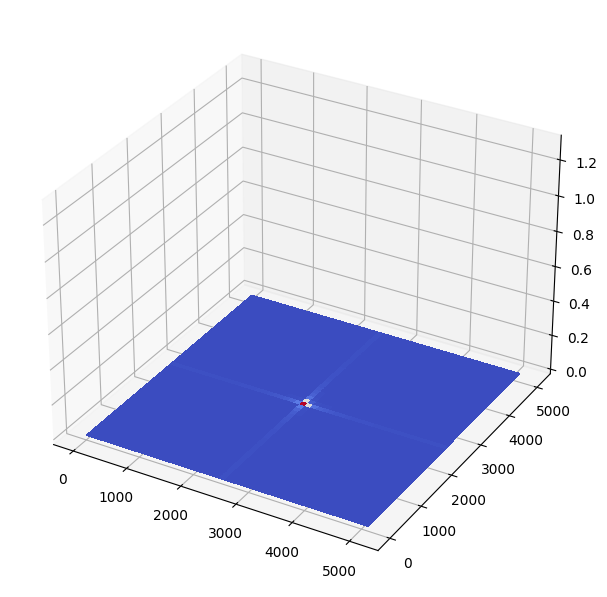

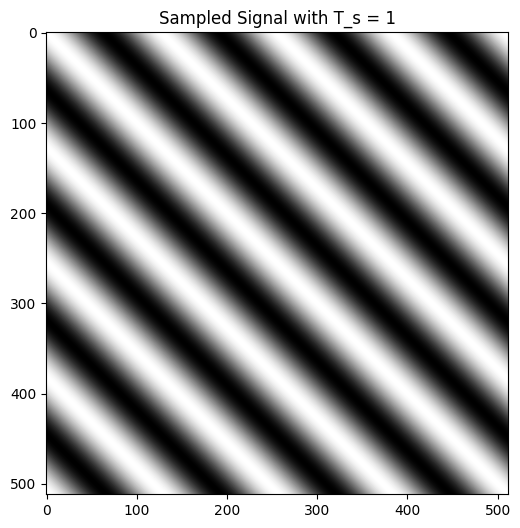

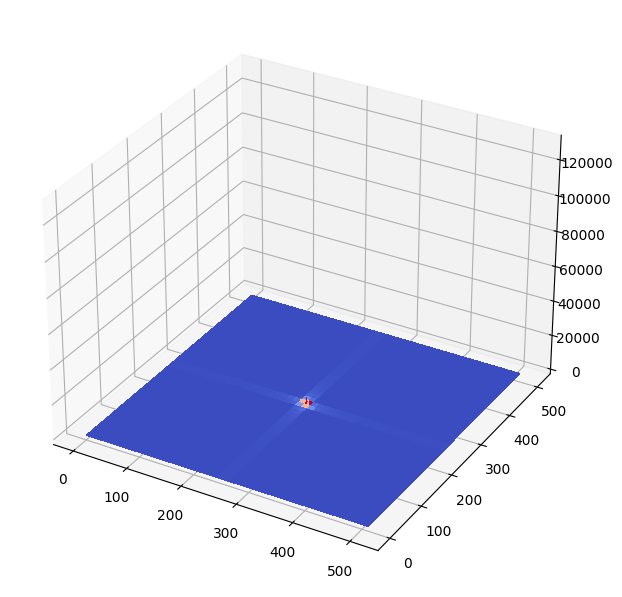

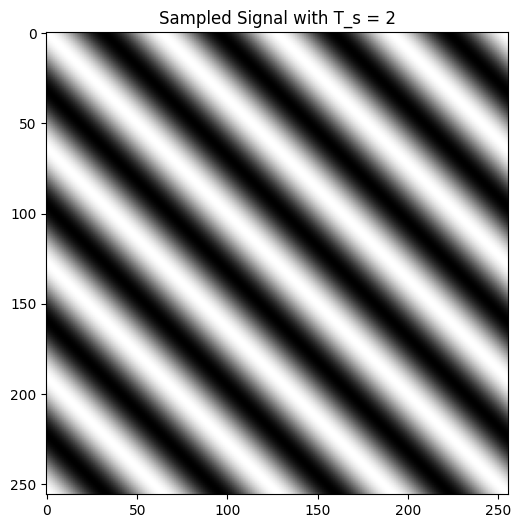

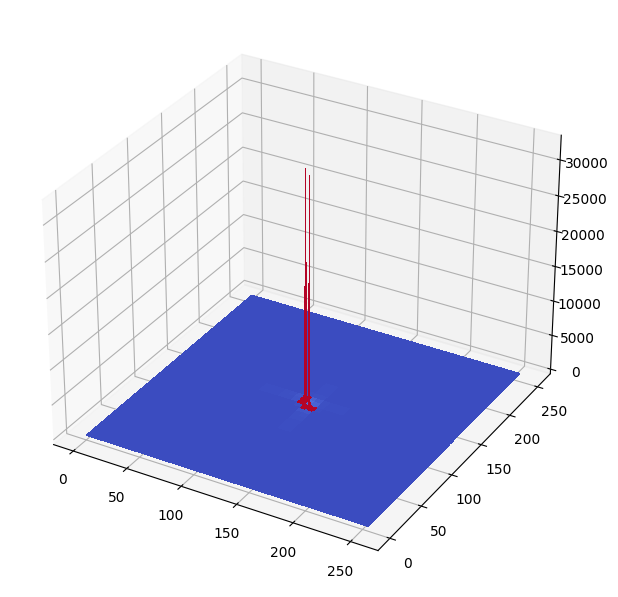

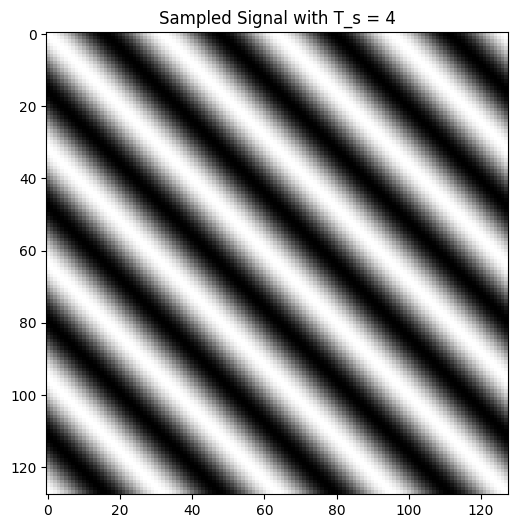

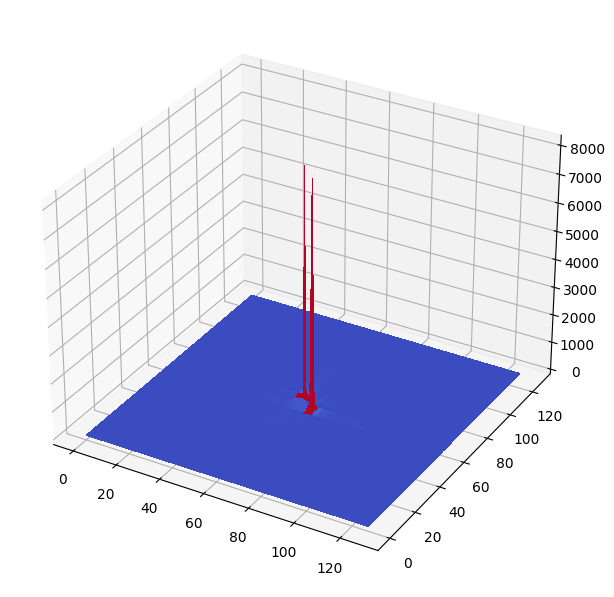

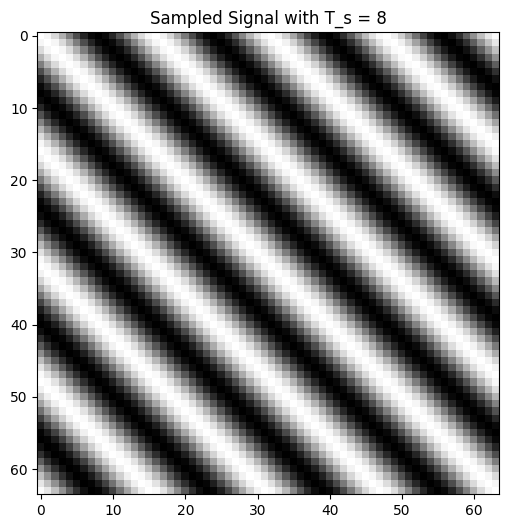

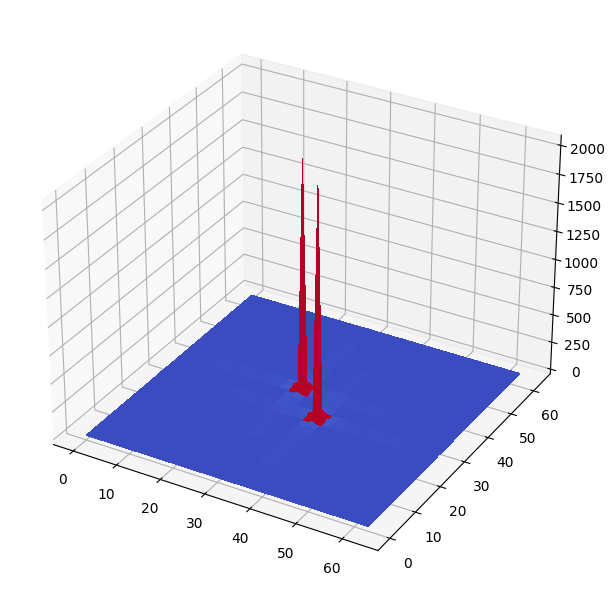

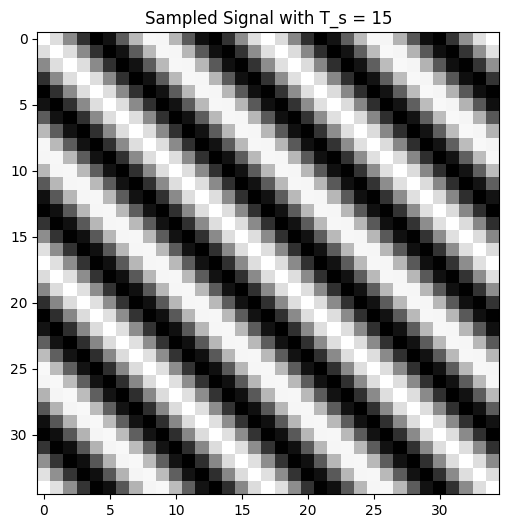

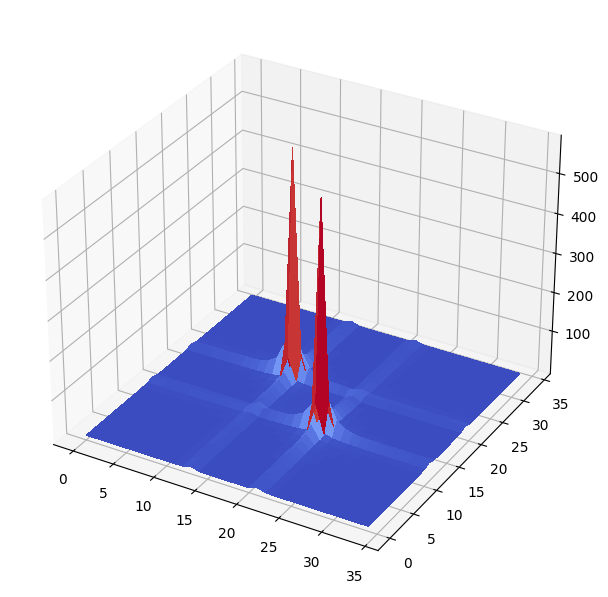

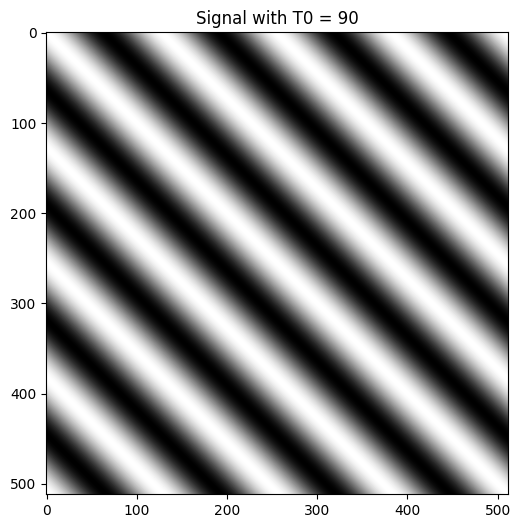

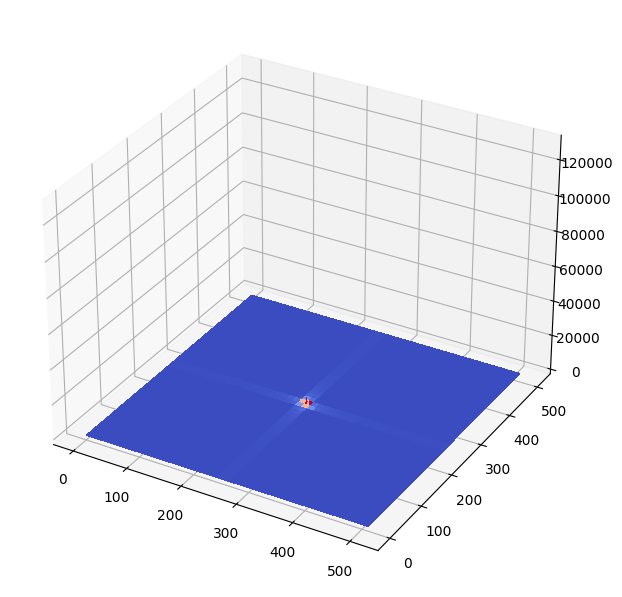

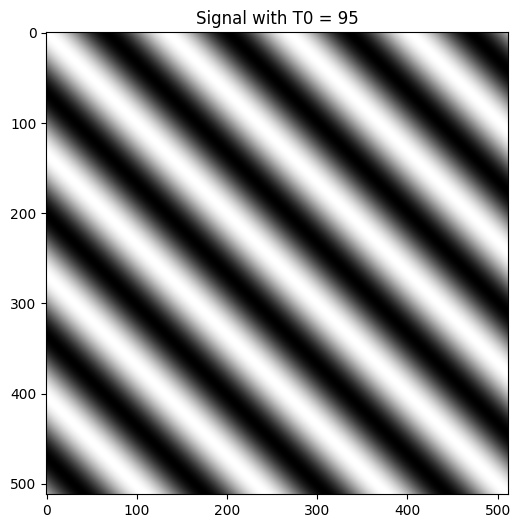

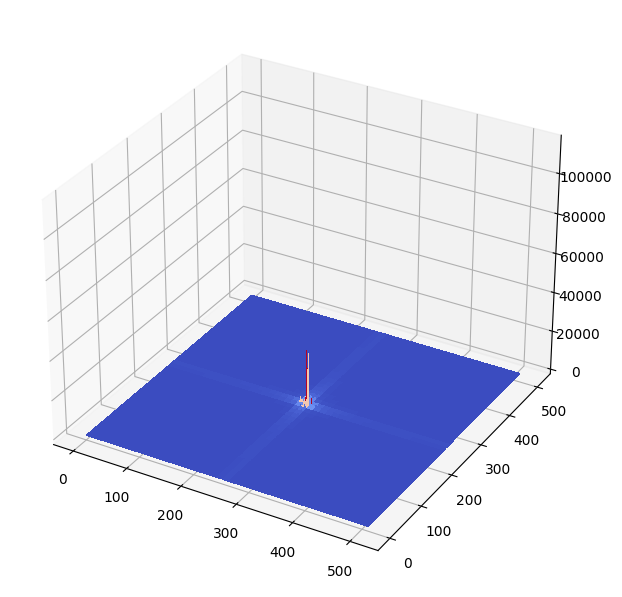

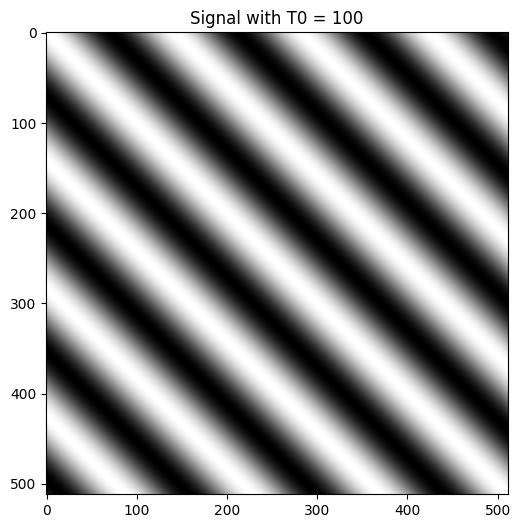

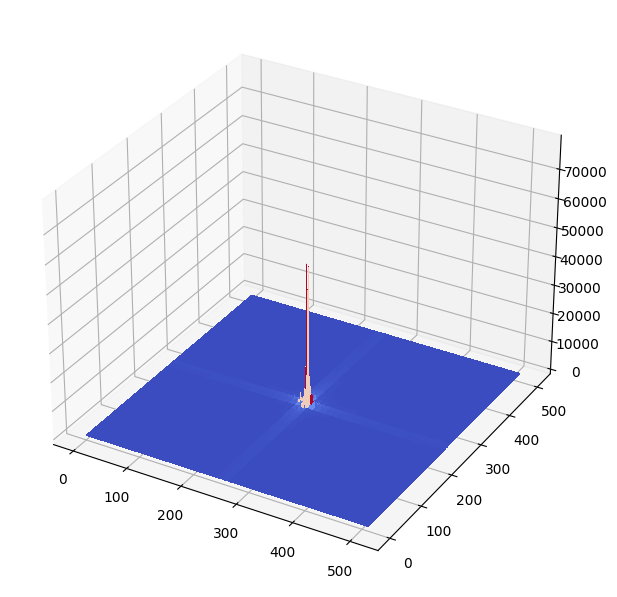

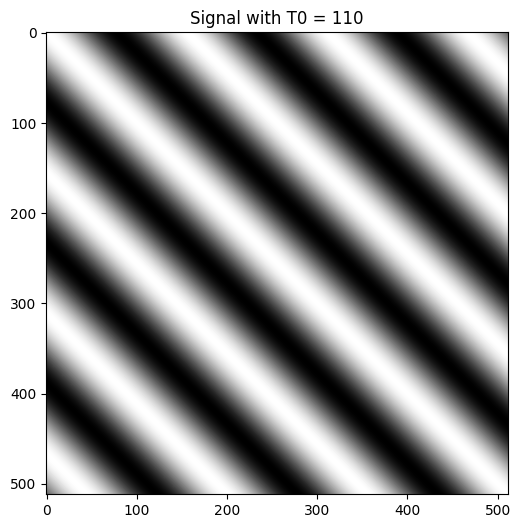

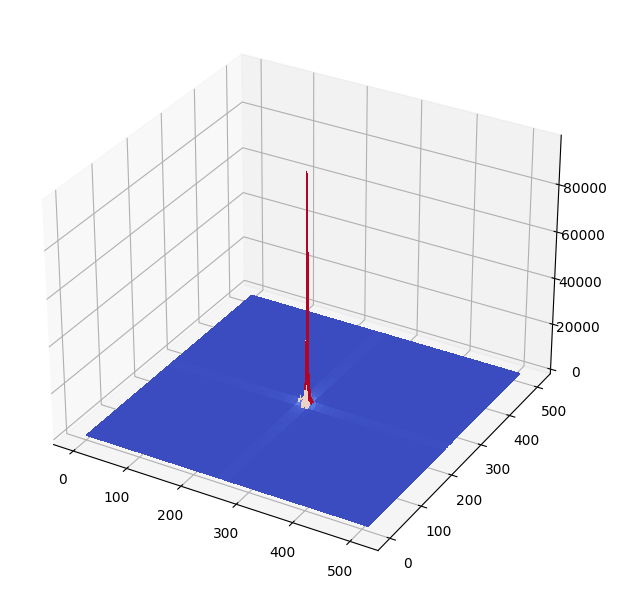

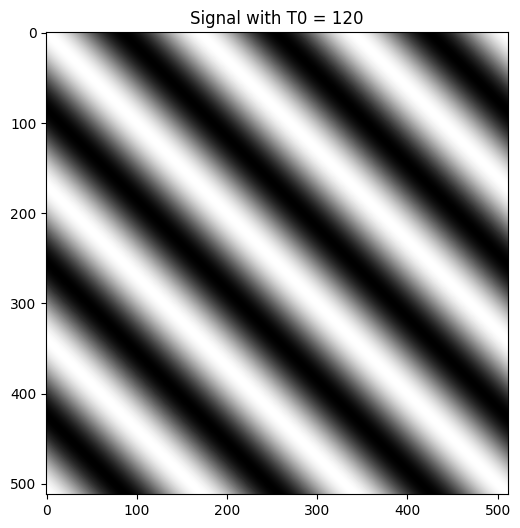

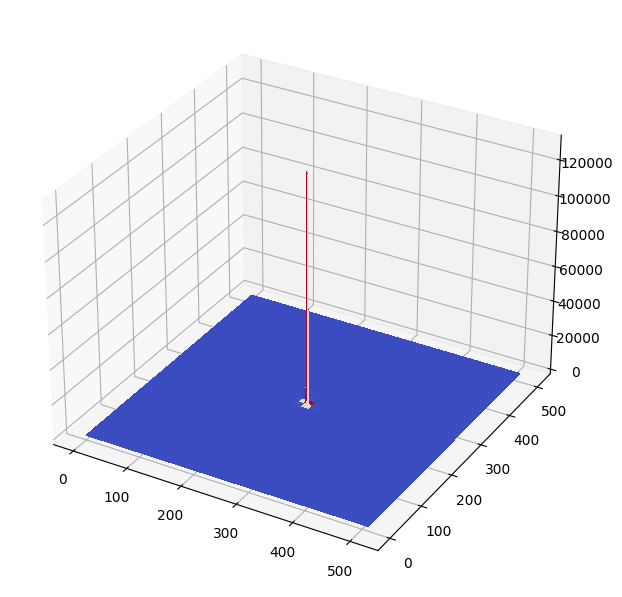

'\nIt should be noted that the interactivity issue makes it hard to see when the peaks merge but I could see that it is around 90-100, when the \npeaks merged.\n'

In [40]:
#d.1
"""
we can see the two Dirac peaks, which is expected due to my signal being a cosine wave.
"""

#d.2
#to make it easier to do FT
def compute_fft(signal):
    FT_signal = fft2(signal)
    FT_shifted = fftshift(np.abs(FT_signal))
    return FT_shifted
    
# continuous signal s_45
continuous_signal = sinusoid2d(1, 45, 512, 90, Te=0.1) #make Te super small so it is continuous
imshow(continuous_signal, title="Continuous Signal s_45")

FT_continuous = compute_fft(continuous_signal)
surf(FT_continuous, title="FT of the Continuous Signal s_45")

# check different Ts
sampling_values = [1, 2, 4, 8, 15]  

for val in sampling_values:
    T_s = val  
    sampled_signal = sinusoid2d(1, 45, 512, 90, T_s)
    imshow(sampled_signal, title=f"Sampled Signal with T_s = {T_s}")
    
    FT_sampled = compute_fft(sampled_signal)
    surf(FT_sampled, title=f"Fourier Transform of Sampled Signal (T_s = {T_s})")
"""
We can see that as we decrease the sampling rate and increase the T_s, we are sampling the signal less frequently which results in aliasing.
We also see the periodization. In the frequency domain, the spectrum consists of multiple repeats of the original spectrum with interval f_s
"""

#d.3
""" 
The smaller peaks(lobes) occur due to the windowing of the original sample. Since the original sample was infinite continuous, we had 
to switch it so it is defined over a finite grid which is done by applying a rectangular function (window).  However, the FT of the
rectangular function is the sinc function. This causes the main peaks to spread around the main peaks, creating the lobes  
It should be noted that this windowing is done implicitly in the FFT calculations.
"""
#d.4
# Test duper big T0 values
T0_values = [90, 95, 100, 110, 120] 

for T0 in T0_values:
    signal = sinusoid2d(1, 45, 512, T0, 1)
    imshow(signal, title=f"Signal with T0 = {T0}")
    FT_signal = compute_fft(signal)
    surf(FT_signal, title=f"Fourier Transform (T0 = {T0})")
"""
It should be noted that the interactivity issue makes it hard to see when the peaks merge but I could see that it is around 90-100, when the 
peaks merged.
"""

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

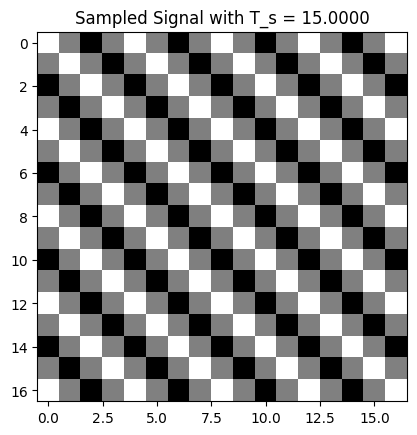

In [41]:
f_max = (1/90)/ np.sqrt(2)
f_sample = 4 * f_max
T_sample = 1/ f_sample
sampled_signal = sinusoid2d(1, 45, 512, 90, T_sample)

# Display
plt.imshow(sampled_signal, cmap='gray')
plt.title(f"Sampled Signal with T_s = {T_s:.4f}")
plt.show()

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [42]:
def error(A, x_r, x_d, L):
    """
    Calculate the relative average error between x_r and x_d
    
    Parameters:
    A --> Amplitude of the original signal
    x_r -- >Reconstructed signal 
    x_d --> Degraded signal 
    
    Returns:
    e_r -- Relative average error
    """
    er = 0
    for k in range (L):
        for l in range(L):
            er = er+np.abs(x_r[k,l] - x_d[k,l])
    return (er / (2 * A*L**2))


3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

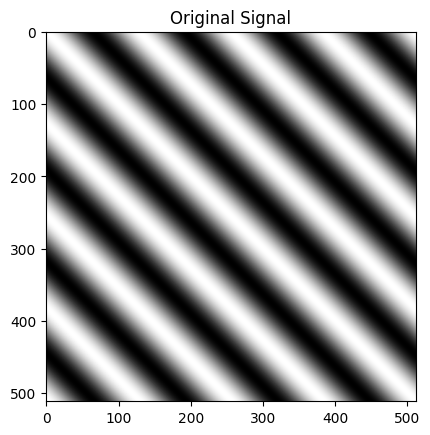

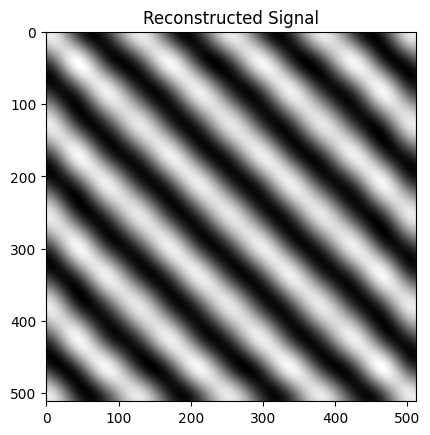

Relative Average Error: 0.023169331828863934


"\nThe sampled signal does not fully capture all of the original signal's frequencies. \n"

In [43]:
original_signal = sinusoid2d(1, 45, 512, 90, 1)
sampled_signal = sinusoid2d(1, 45, 512, 90, T_sample)
reconstructed_signal = shannonInterpolation(sampled_signal, T_sample, 512)

# Display the original
plt.imshow(original_signal, cmap='gray')
plt.title("Original Signal")
plt.show()

# Display the reconstructed 
plt.imshow(reconstructed_signal, cmap='gray')
plt.title("Reconstructed Signal")
plt.show()

# Calculate and print the relative average error
err = error(1, original_signal, reconstructed_signal, 512)
print(f"Relative Average Error: {err}")

"""
The sampled signal does not fully capture all of the original signal's frequencies. 
"""

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

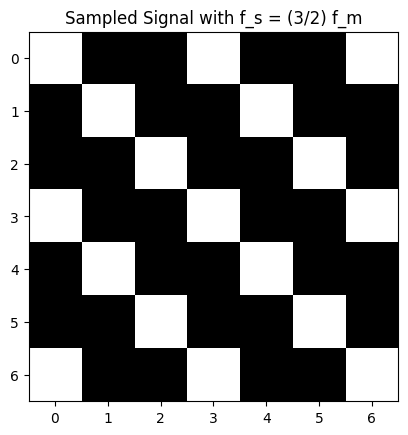

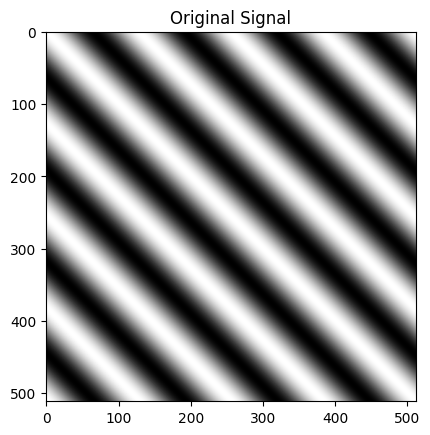

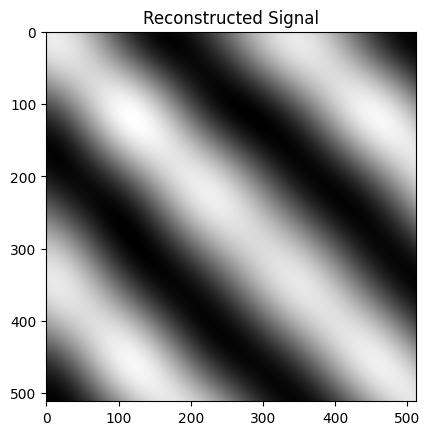

Relative Average Error: 0.40960530576121695


'\nsince the new f_s is below 2* f_max, due to the shanon theorem we get aliasing. This is because the frequency components overlap  \nwhich in turn gives the image a distorted look. \n'

In [44]:
f_max2 = (1/90)/ np.sqrt(2)
f_sample2 = (1.5) * f_max2
T_sample2 = 1 / f_sample2
sampled_signal2 = sinusoid2d(1, 45, 512, 90, T_sample2)

# Display
plt.imshow(sampled_signal2, cmap='gray')
plt.title("Sampled Signal with f_s = (3/2) f_m")
plt.show()

original_signal = sinusoid2d(1, 45, 512, 90, 1)
reconstructed_signal = shannonInterpolation(sampled_signal, T_sample2, 512)

# Display the original
plt.imshow(original_signal, cmap='gray')
plt.title("Original Signal")
plt.show()

# Display the reconstructed 
plt.imshow(reconstructed_signal, cmap='gray')
plt.title("Reconstructed Signal")
plt.show()

# Calculate and print the relative average error
err = error(1, original_signal, reconstructed_signal, 512)
print(f"Relative Average Error: {err}")


"""
since the new f_s is below 2* f_max, due to the shanon theorem we get aliasing. This is because the frequency components overlap  
which in turn gives the image a distorted look. 
"""

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

f_max for 10°: 0.010942308366802312


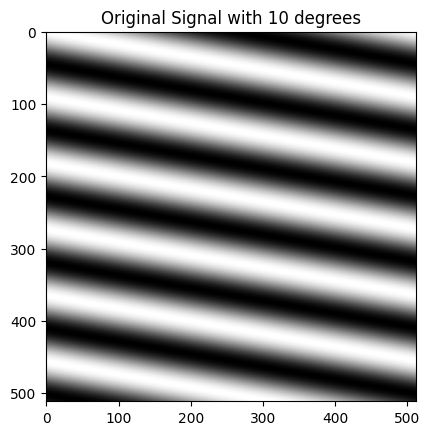

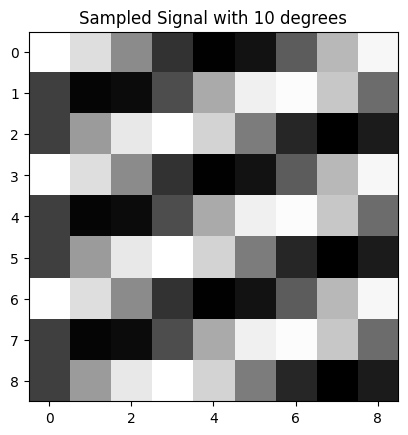

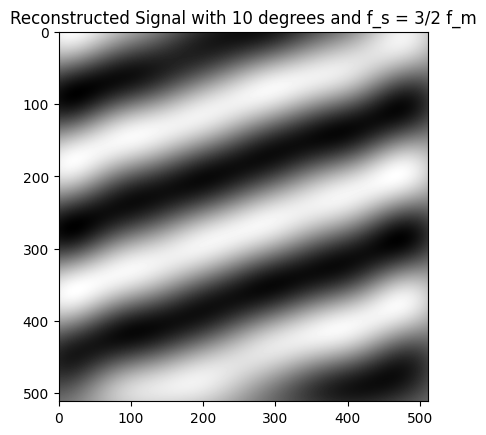

error is:
0.3953483994608665


'\nwe have again aliasing due to the fact that f_sampled < 2 * f_max. \nHowever, this time we also see a change in the direction of the signal. I think this is because for 10 degrees the sample is not\nas well aligned with the sampling grid as it was for 45 degrees since 45 degrees was just on the diagonal. \n'

In [45]:
#find the maximal freq
angle_rad = np.deg2rad(10)
f0 = 1/90
f_t_max = f0 * np.cos(angle_rad)
f_u_max = f0 * np.sin(angle_rad)
f_max3 = np.max([f_t_max, f_u_max])
print(f"f_max for 10°: {f_max3}")

#sampling
T_sampled3 = 1/(1.5 * f_max3)

original_signal3 = sinusoid2d(1, 10, 512, 90, 1)
sampled_signal3 = sinusoid2d(1, 10, 512, 90, T_sampled3)
reconstructed_signal3 = shannonInterpolation(sampled_signal3, T_sampled3, 512)

#display
plt.imshow(original_signal3, cmap='gray')
plt.title("Original Signal with 10 degrees")
plt.show()

plt.imshow(sampled_signal3, cmap='gray')
plt.title("Sampled Signal with 10 degrees")
plt.show()


plt.imshow(reconstructed_signal3, cmap='gray')
plt.title("Reconstructed Signal with 10 degrees and f_s = 3/2 f_m")
plt.show()

#error calc
print("error is:")
print(error(1, original_signal3, reconstructed_signal3, 512))

"""
we have again aliasing due to the fact that f_sampled < 2 * f_max. 
However, this time we also see a change in the direction of the signal. I think this is because for 10 degrees the sample is not
as well aligned with the sampling grid as it was for 45 degrees since 45 degrees was just on the diagonal. 
"""


6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.

In [46]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below

def shannonInterpolationLoop(x_s, Ts, L):
    x_r = np.zeros((L, L)) # reconstructed

    for t in range(L):
        for u in range(L):
            summm = 0
            for k in range(x_s.shape[0]):
                for l in range(x_s.shape[1]):
                    sinc_t = np.sinc((t - k * Ts) / Ts)
                    sinc_u = np.sinc((u - l * Ts) / Ts)
                    summm += x_s[k, l] * sinc_t * sinc_u
            x_r[t, u] = summm
    
    return x_r

#signals (note given in question L = 64)
original_signal4= sinusoid2d(1, 45, 64, 64, 1)

f_max4= (1/64)/ np.sqrt(2)
T_sampled4 = 1/ (4*f_max4)
sampled_signal4 = sinusoid2d(1, 45, 64, 64, T_sampled4)

#time measurments
tic()
shannonInterpolationLoop(sampled_signal4, T_sampled4, 64)
tac()

tic()
shannonInterpolation(sampled_signal, T_sampled4, 64)
tac()

"""As expected the nested loops are much slower than the matrix version, this is because matrix multiplication in Python is optimized while 
even if a nested loop does the same thing, it is much slower.
"""

0.7236263300000019
0.00043369700000539524


'As expected the nested loops are much slower than the matrix version, this is because matrix multiplication in Python is optimized while \neven if a nested loop does the same thing, it is much slower.\n'


## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

The subsample of factor 2 is when we decrease the image size by taking one out of every 2 pixels in both the horizontal and vertical direction. This causes the new image to be 1-fourth of the old image in pixel size.

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

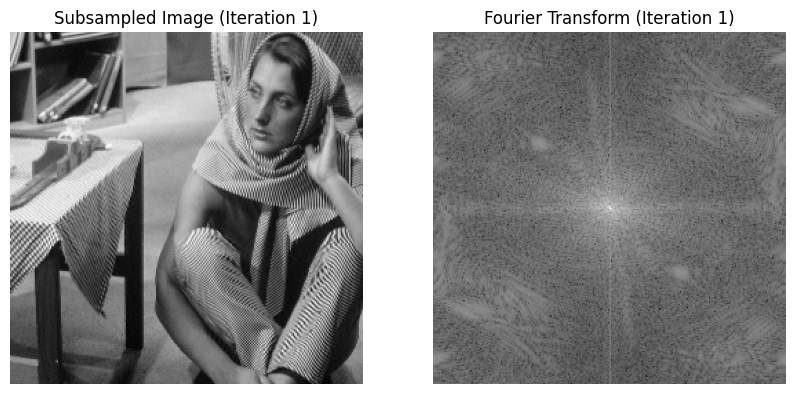

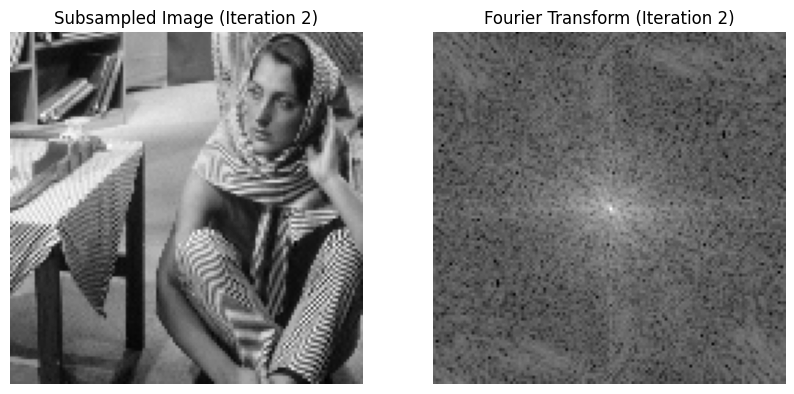

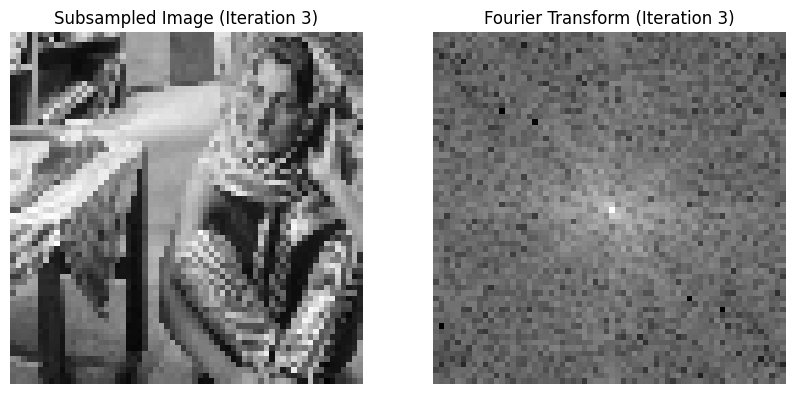

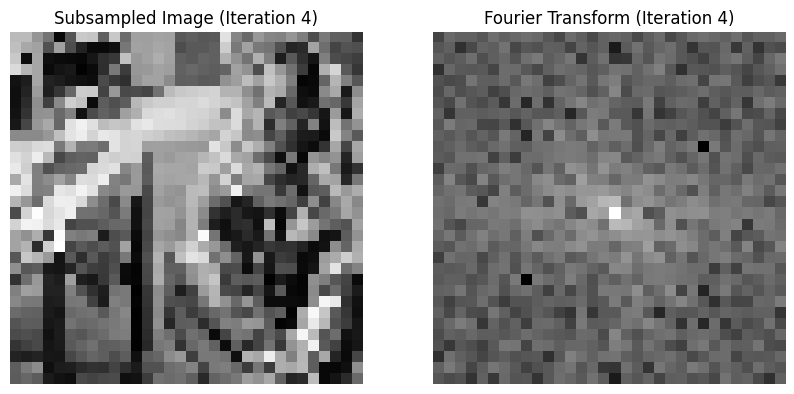

'\nWe see that as we continue to subsample, the details of the image are lost. aliasing is a drawback because it causes the image to be \nmisrepresented, where it becomes impossible to reconstruct the image and fully recover the missing parts.  \n'

In [47]:
from PIL import Image
def subsample2(image):
    return image[::2, ::2]
#a new function for FFT with log to better see the results

def compute_fourier(image):
    F = fft2(image)
    F_shifted = fftshift(F)
    magnitude_spectrum = np.log(np.abs(F_shifted) + 1)  # Log scale for better visibility
    return magnitude_spectrum



def iterativeSubsample( image, num_iterations=4):
    subsampled_image = image
    for i in range(num_iterations):
        subsampled_image = subsample2(subsampled_image)
 
        FT = compute_fourier(subsampled_image)
        
        # Display the subsampled image
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(subsampled_image, cmap='gray')
        plt.title(f"Subsampled Image (Iteration {i+1})")
        plt.axis('off')
        
        # Display the Fourier transform
        plt.subplot(1, 2, 2)
        plt.imshow(FT, cmap='gray')
        plt.title(f"Fourier Transform (Iteration {i+1})")
        plt.axis('off')
        
        plt.show()

#barabara
img_barbara = Image.open("img/barbara.png").convert('L')
img_array = np.array(img_barbara)

iterativeSubsample(img_array, num_iterations=4)

"""
We see that as we continue to subsample, the details of the image are lost. aliasing is a drawback because it causes the image to be 
misrepresented, where it becomes impossible to reconstruct the image and fully recover the missing parts.  
"""

3. Same question with the image `img/mandrill.png`.

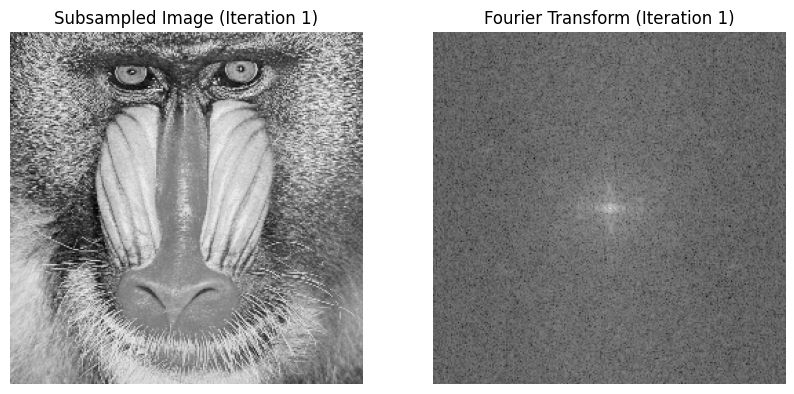

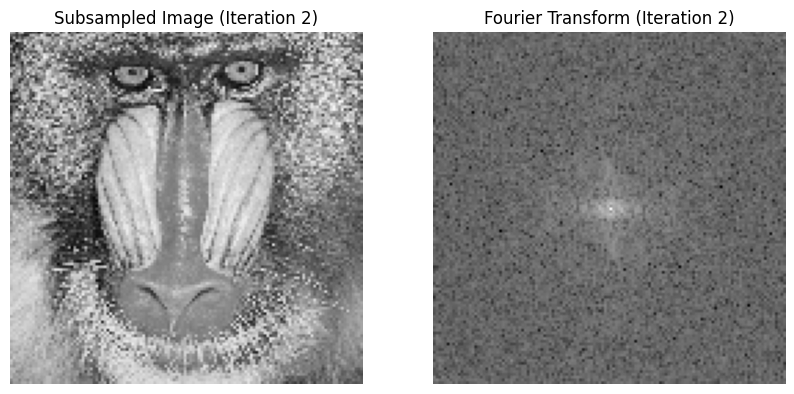

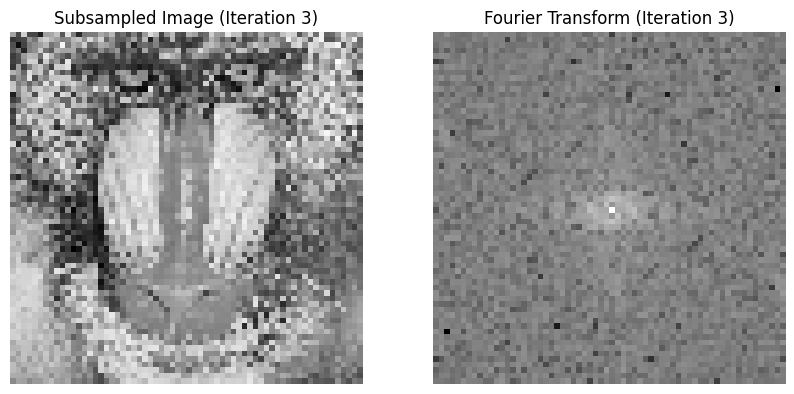

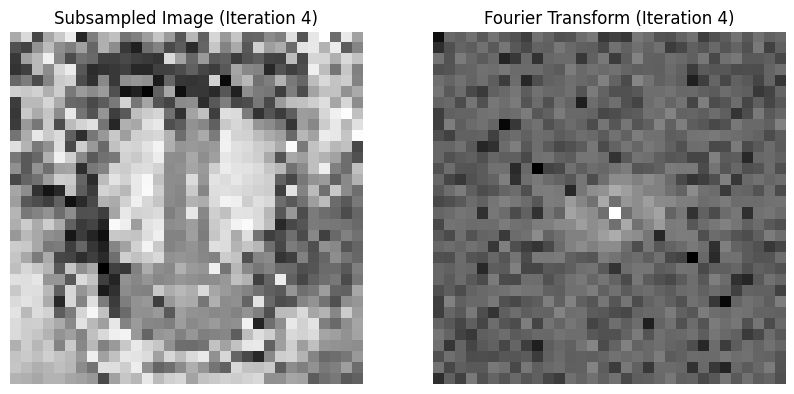

'\nThe same can be said here:\nWe see that as we continue to subsample, the details of the image are lost. aliasing is a drawback because it causes the image to be \nmisrepresented, where it becomes impossible to reconstruct the image and fully recover the missing parts.  \n'

In [48]:
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below

#mandrill
img_barbara = Image.open("img/mandrill.png").convert('L')
img_array = np.array(img_barbara)

iterativeSubsample(img_array, num_iterations=4)

"""
The same can be said here:
We see that as we continue to subsample, the details of the image are lost. aliasing is a drawback because it causes the image to be 
misrepresented, where it becomes impossible to reconstruct the image and fully recover the missing parts.  
"""